In [1]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import requests
url = 'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz'
r = requests.get(url, allow_redirects=True)
open('imagenette2-160.tgz', 'wb').write(r.content)

99003388

In [3]:
import sys, tarfile
def extract(tar_url, extract_path='.'):
    print(tar_url)
    tar = tarfile.open(tar_url, 'r')
    for item in tar:
        tar.extract(item, extract_path)
        if item.name.find(".tgz") != -1 or item.name.find(".tar") != -1:
            extract(item.name, "./" + item.name[:item.name.rfind('/')])
try:

    extract(sys.argv[1] + '.tgz')
    print('Done.')
except:
    name = os.path.basename(sys.argv[0])
    print(name[:name.rfind('.')], '<filename>')

-f.tgz
ipykernel_launcher <filename>


In [4]:
extract('imagenette2-160.tgz')

imagenette2-160.tgz


In [5]:
train_img_datagen = ImageDataGenerator(rescale=1./255)
val_img_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_img_datagen.flow_from_directory('imagenette2-160/train',
                                                 target_size=(160,160),
                                                 batch_size=64,
                                                 class_mode='categorical')

val_set = val_img_datagen.flow_from_directory('imagenette2-160/val',
                                                 target_size=(160,160),
                                                 batch_size=64,
                                                 class_mode='categorical')

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [6]:
base_model = tf.keras.applications.ResNet50(input_shape=(160,160,3), include_top=False, weights='imagenet', pooling='avg')

In [7]:
model = Sequential()
model.add(base_model)
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, decay=1e-6), metrics=['accuracy'])

In [10]:
try: 
    os.mkdir('./checkpoint')
except:
    pass

In [11]:
file_name = 'best_model_tl.h5'
checkpoint_path = os.path.join('./checkpoint',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [12]:
model_info = model.fit(train_set, epochs=30, validation_data=val_set, callbacks=call_back)

Epoch 1/30
148/148 [==============================] - 73s 427ms/step - loss: 0.8549 - accuracy: 0.7556 - val_loss: 64.4128 - val_accuracy: 0.0986

Epoch 00001: val_accuracy improved from -inf to 0.09860, saving model to ./checkpoint\best_model_tl.h5


C:\Users\Lipe\anaconda3\envs\awari\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
148/148 [==============================] - 60s 406ms/step - loss: 0.3522 - accuracy: 0.8875 - val_loss: 2.4539 - val_accuracy: 0.0994

Epoch 00002: val_accuracy improved from 0.09860 to 0.09936, saving model to ./checkpoint\best_model_tl.h5
Epoch 3/30
148/148 [==============================] - 60s 407ms/step - loss: 0.2244 - accuracy: 0.9296 - val_loss: 6.2178 - val_accuracy: 0.0996

Epoch 00003: val_accuracy improved from 0.09936 to 0.09962, saving model to ./checkpoint\best_model_tl.h5
Epoch 4/30
148/148 [==============================] - 60s 408ms/step - loss: 0.1307 - accuracy: 0.9565 - val_loss: 3.0949 - val_accuracy: 0.1931

Epoch 00004: val_accuracy improved from 0.09962 to 0.19312, saving model to ./checkpoint\best_model_tl.h5
Epoch 5/30
148/148 [==============================] - 60s 408ms/step - loss: 0.0949 - accuracy: 0.9685 - val_loss: 1.9549 - val_accuracy: 0.4688

Epoch 00005: val_accuracy improved from 0.19312 to 0.46879, saving model to ./checkpoint\best_mode

In [13]:
 #Saving the model
model.save('./model_tl.h5')

In [14]:
# plots accuracy and loss curves
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

<ipython-input-14-f957539d046f>:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-14-f957539d046f>:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


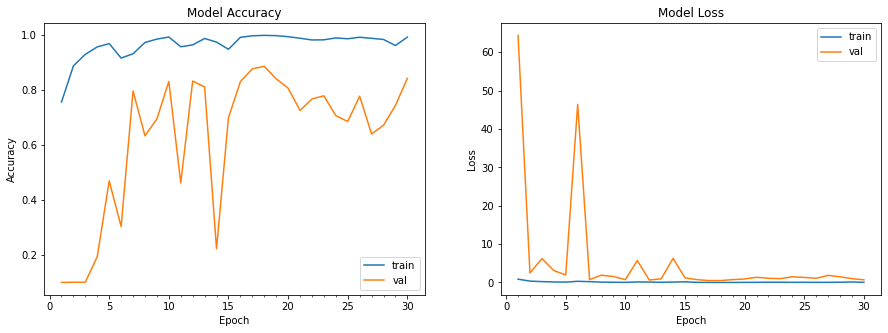

In [15]:
plot_model_history(model_info)